Life Expectancy Prediction Model using Machine Learning

This is a simple machine learning model to predict life expectancy using the WHO dataset taken from kaggle dataset. This model is an supervised learning model. 

1) Importing the libraries

In [ ]:
import pandas as pd 
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as random_forst

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score

Creating Data Frame

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')


Data Analysis

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
sns.countplot(x="GDP",data=df)
plt.show()

In [ ]:
df.isnull().sum(axis=0)

In [ ]:
before_drop = df.shape[0]
df = df.dropna()
after_drop = df.shape[0]
print('rows before droping nulls:', before_drop)
print('rows after droping nulls:', after_drop)

In [ ]:
df.describe()

In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01
under-five deaths,1649.0,4.422013e+01,1.628980e+02,0.00000,1.000000,4.000000e+00,2.900000e+01,2.100000e+03
Polio,1649.0,8.356458e+01,2.245056e+01,3.00000,81.000000,9.300000e+01,9.700000e+01,9.900000e+01


<AxesSubplot:>

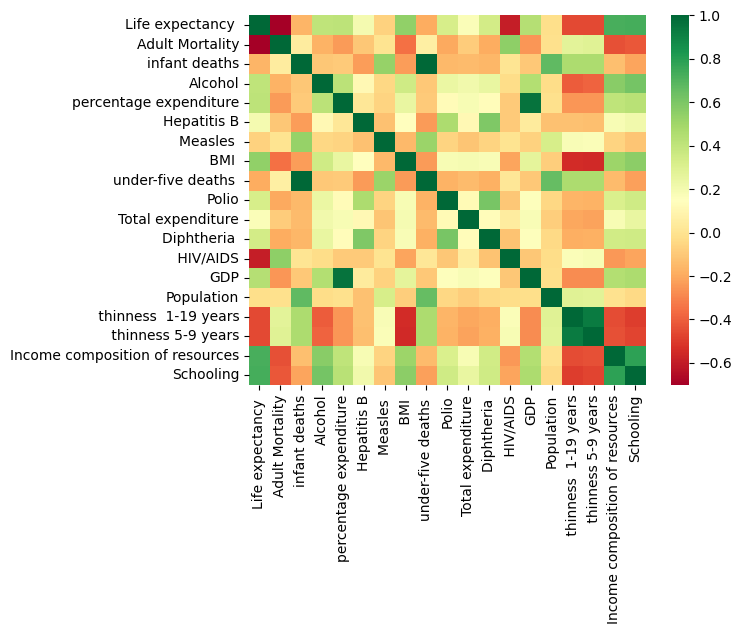

In [44]:
sns.heatmap(df.corr(), cmap='RdYlGn')

In [45]:

y = df['Life expectancy '].values
X_gdp = df['GDP'].values


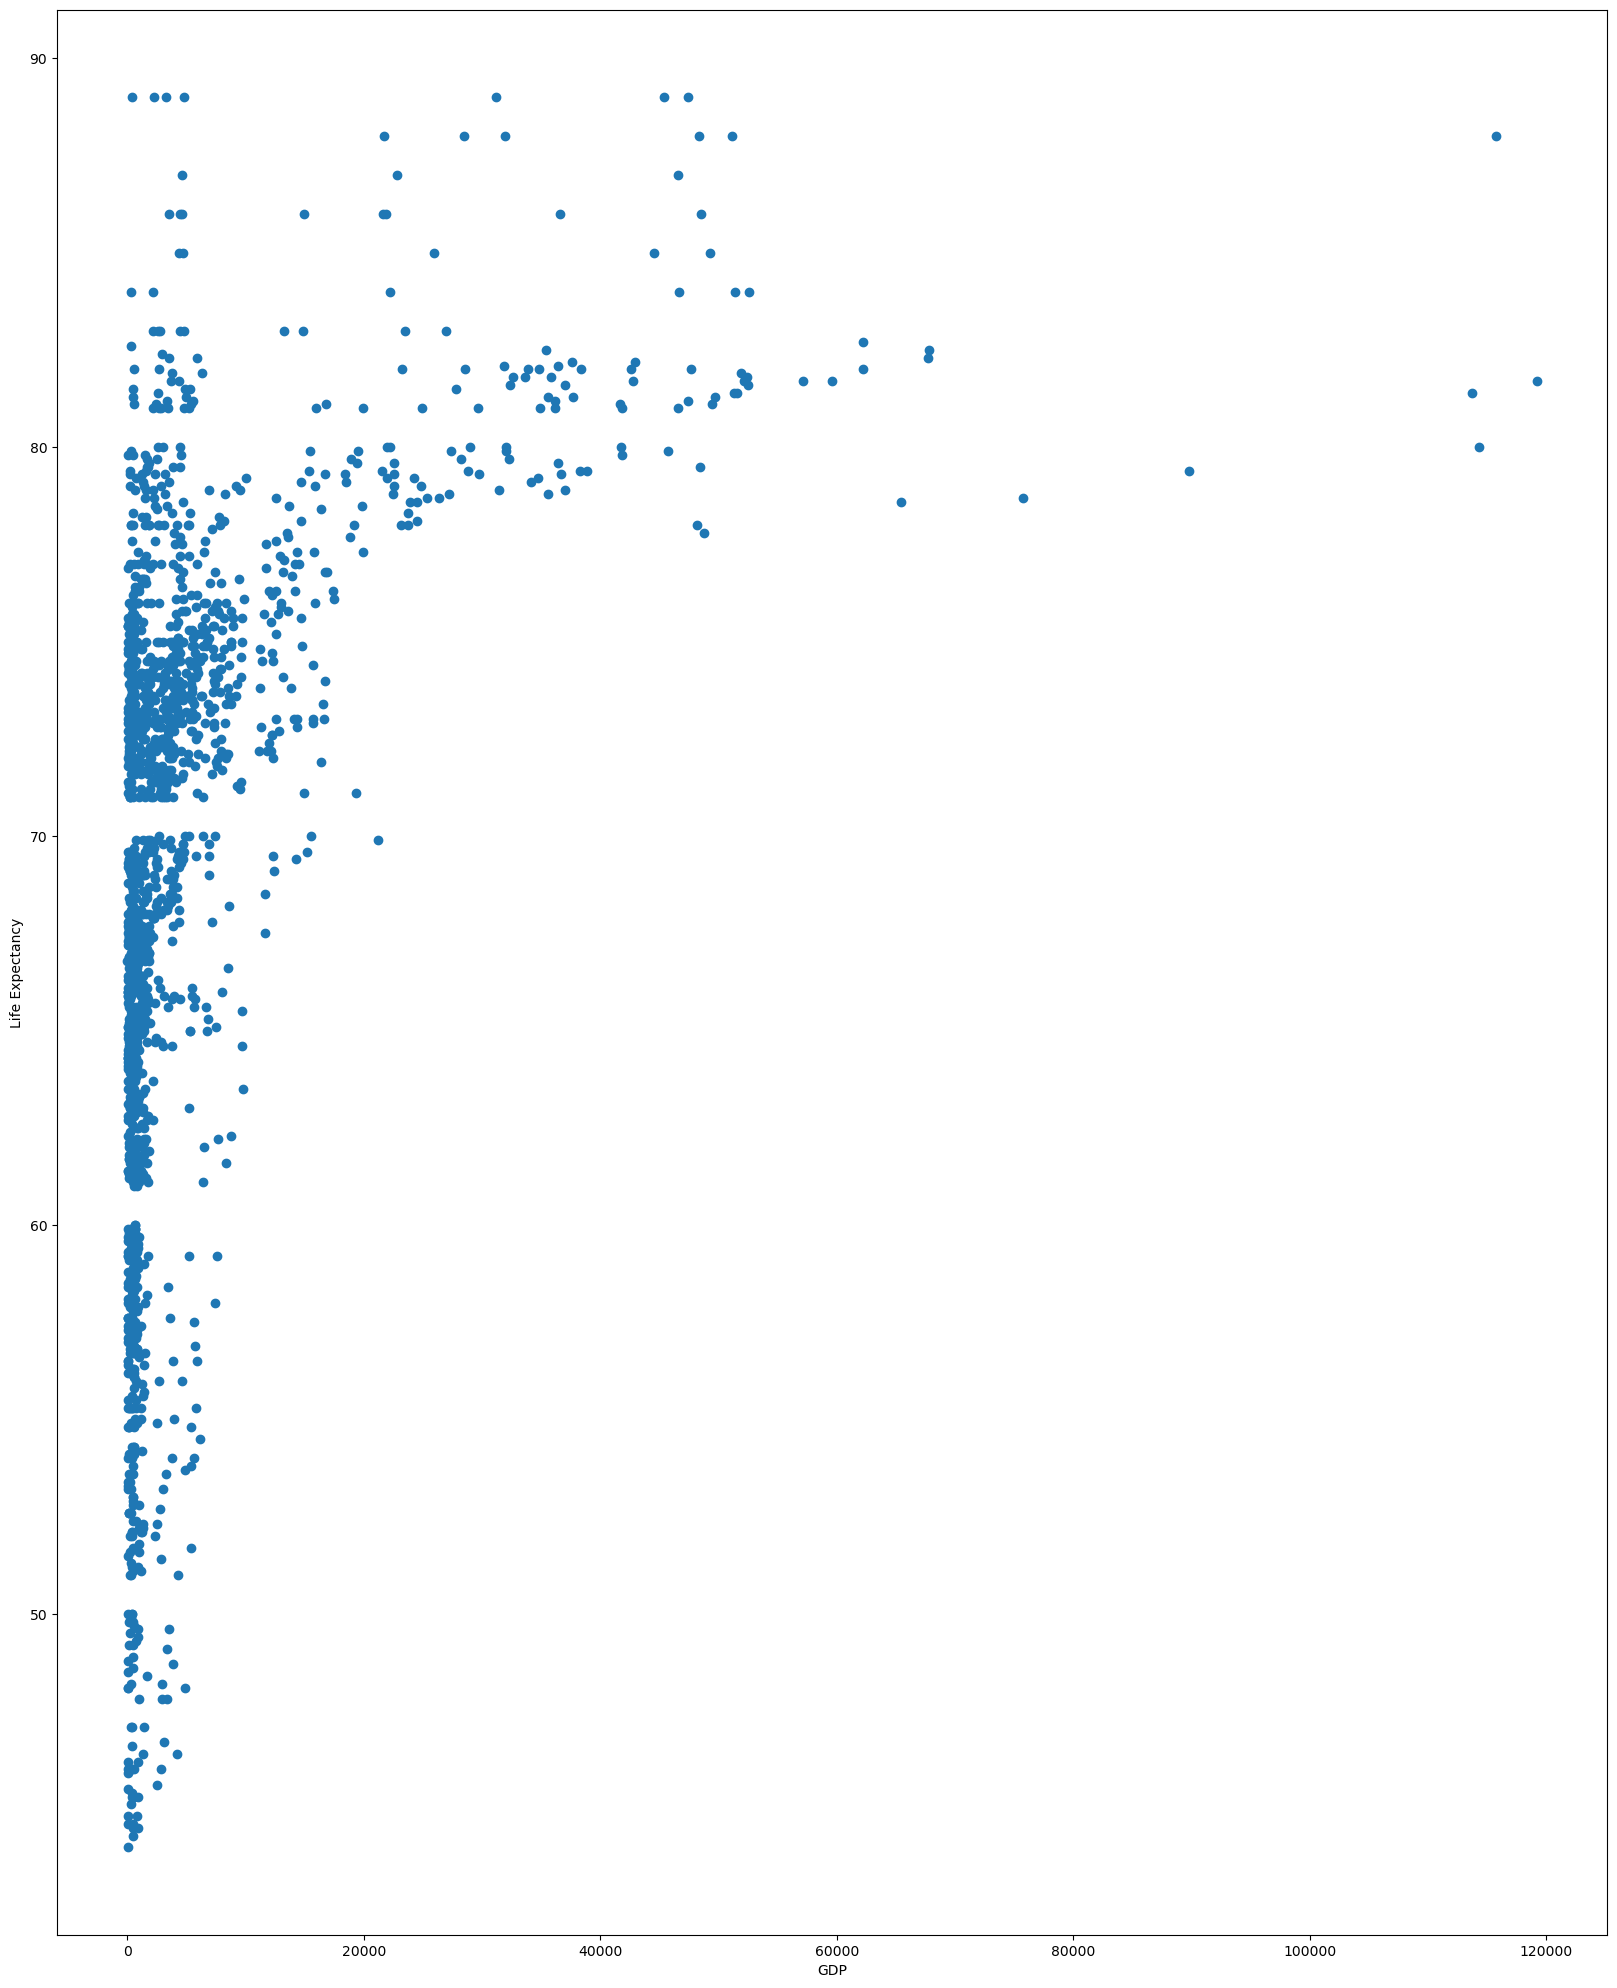

In [46]:
plt.figure(figsize=(20,25))
plt.scatter(X_gdp, y)

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

In [47]:
lnreg = LinearRegression()

In [48]:
prediction_space = np.linspace(min(X_gdp), max(X_gdp)).reshape(-1,1)

In [49]:
print(y)

[65.  59.9 59.9 ... 44.8 45.3 46. ]


In [50]:
print(X_gdp)

[584.25921   612.696514  631.744976  ...  57.34834   548.587312
 547.3588785]


In [51]:
X_gdp=np.array(X_gdp).reshape(-1,1)

In [52]:
y=np.array(y).reshape(-1,1)

In [53]:
lnreg.fit(X_gdp,y)

LinearRegression()

In [54]:
y_pred = lnreg.predict(prediction_space)

In [55]:
print(lnreg.score(prediction_space, y_pred))

1.0


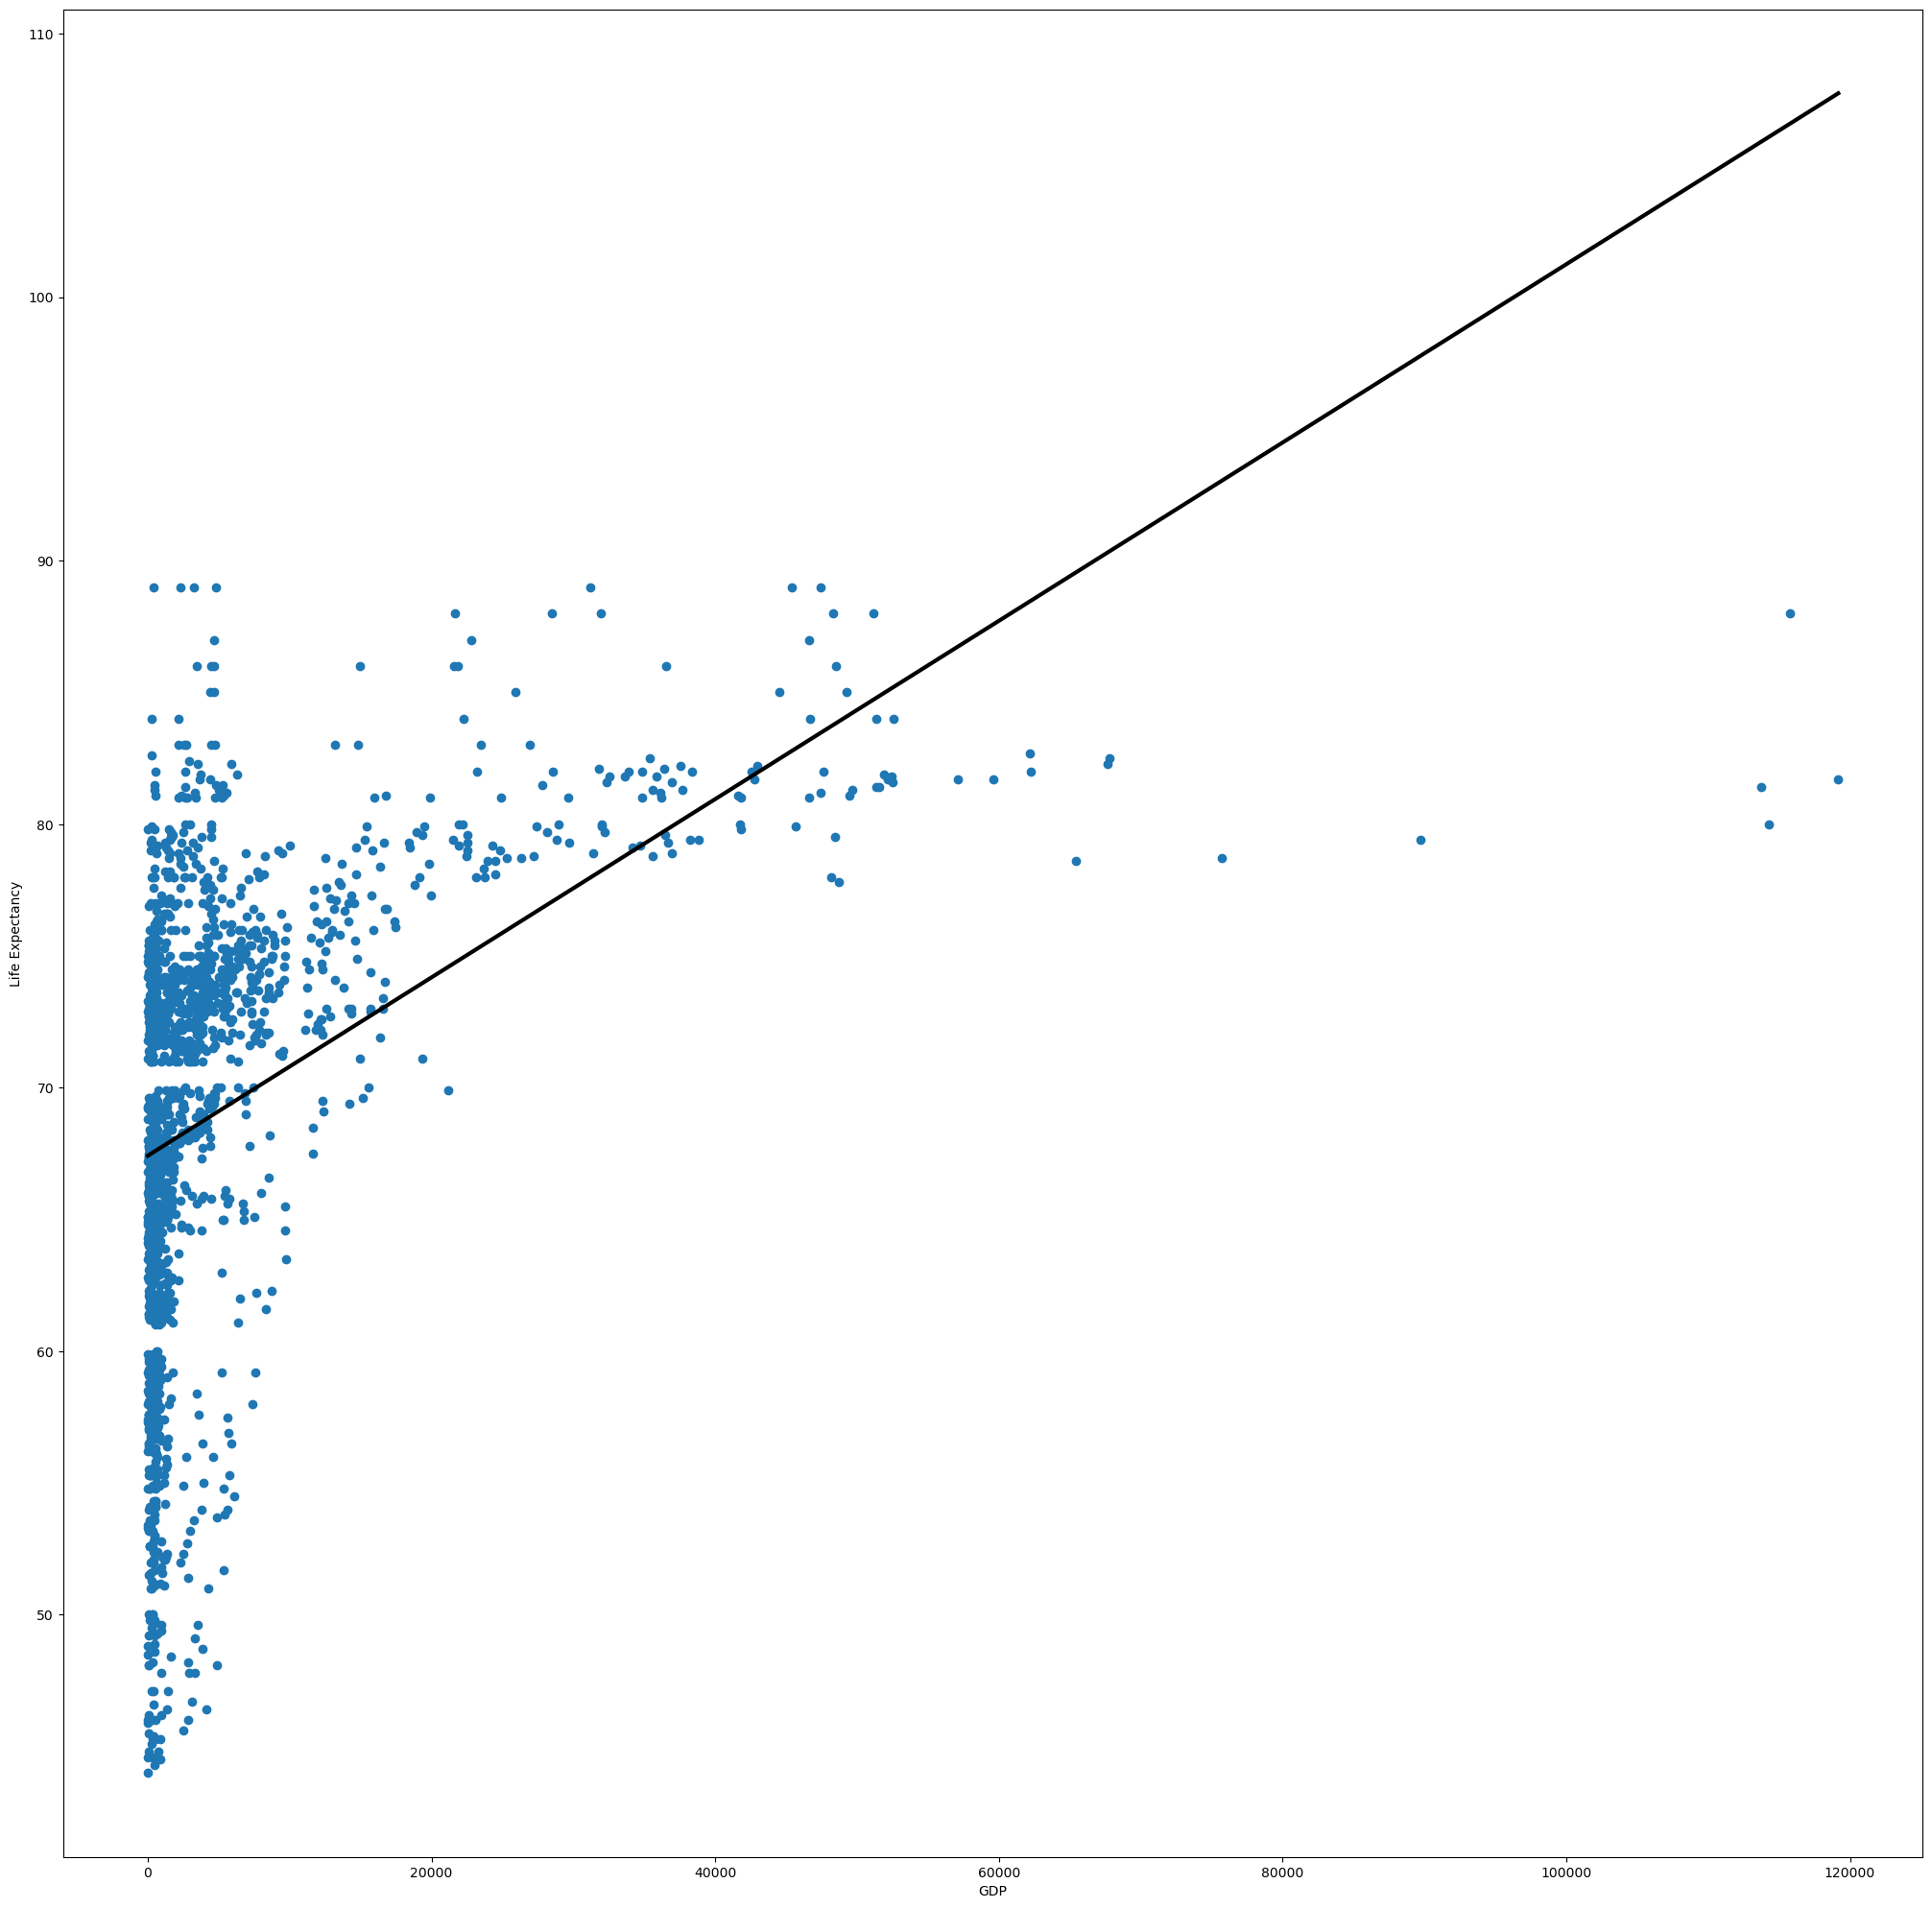

In [56]:
plt.figure(figsize=(25,25))
plt.scatter(X_gdp, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

In [57]:
df = df.drop(['Country','Year','Status'], axis=1)

KeyError: "['Country', 'Year', 'Status'] not found in axis"

In [ ]:
df.describe()

In [ ]:
df.head()

In [58]:
df.tail()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [59]:
y = df['Life expectancy '].values
X = df.drop(['Life expectancy '], axis=1).values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
ln_reg = LinearRegression()

In [62]:
ln_reg.fit(X_train, y_train)

LinearRegression()

In [63]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01
under-five deaths,1649.0,4.422013e+01,1.628980e+02,0.00000,1.000000,4.000000e+00,2.900000e+01,2.100000e+03
Polio,1649.0,8.356458e+01,2.245056e+01,3.00000,81.000000,9.300000e+01,9.700000e+01,9.900000e+01


In [64]:
y = df['Life expectancy '].values
X_bmi = df['GDP'].values

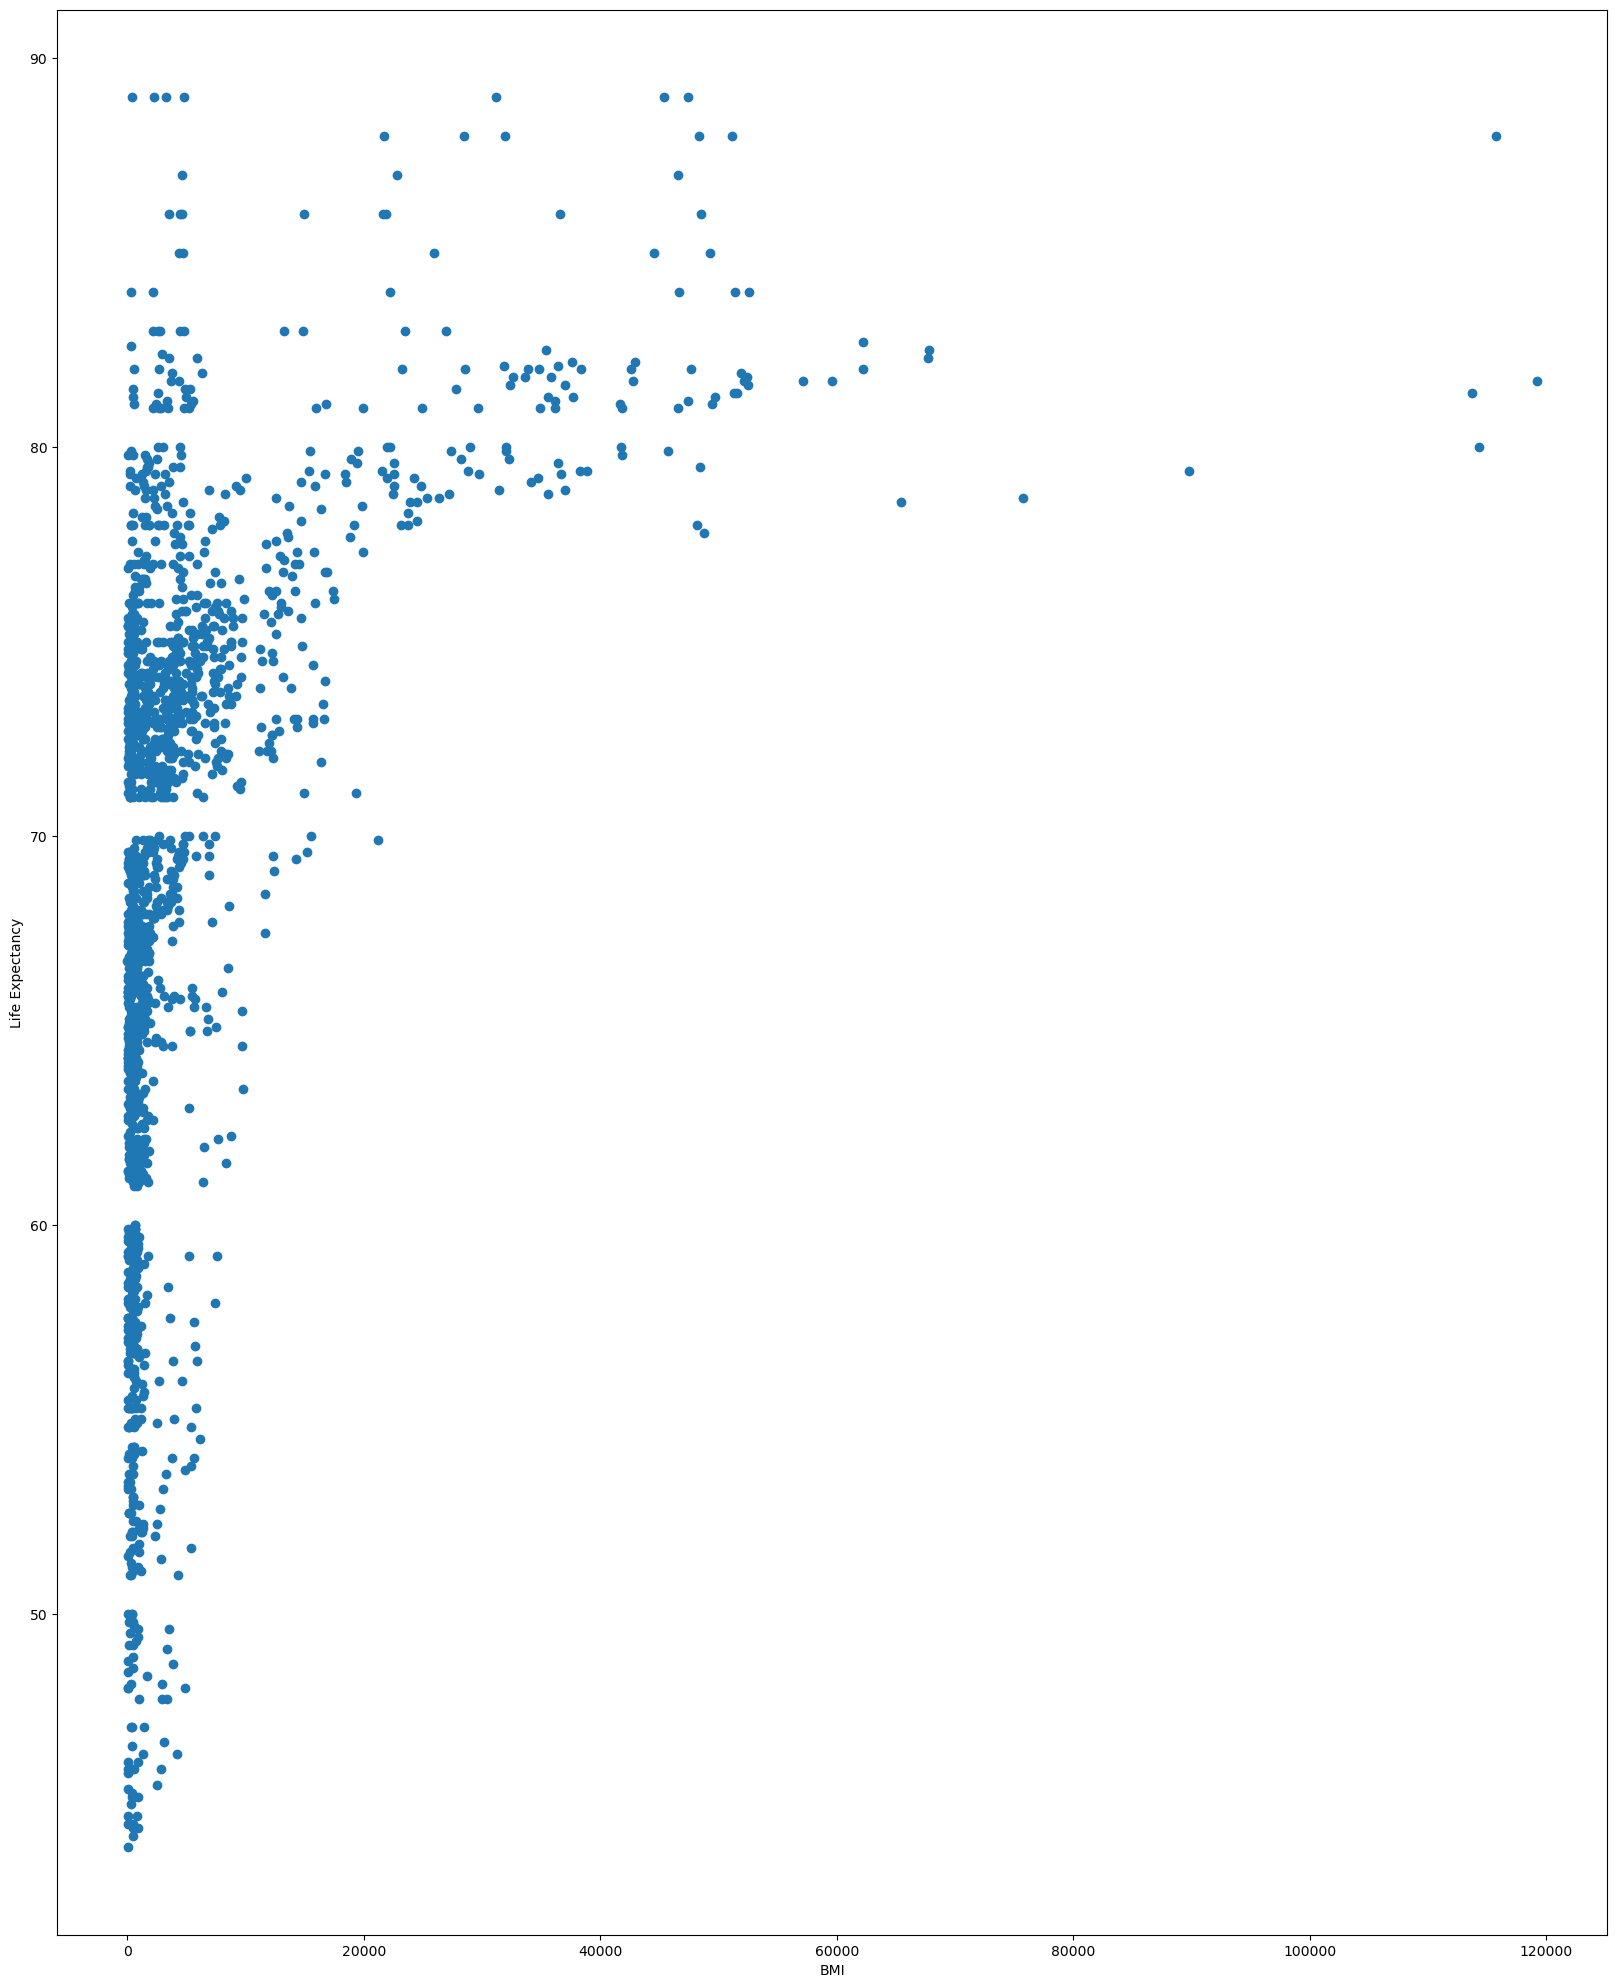

In [65]:
plt.figure(figsize=(20,25))
plt.scatter(X_bmi, y)

plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

In [66]:
y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values

In [67]:
X_t, X_te, y_t, y_te = train_test_split(X_all, y, test_size=0.3, random_state=42)


In [68]:
ln_reg_all = LinearRegression()

In [69]:
ln_reg_all.fit(X_t, y_t)



LinearRegression()

In [70]:
y_pred = ln_reg_temp.predict(X_test)

NameError: name 'ln_reg_temp' is not defined

In [71]:
print('R^2: {}'.format(ln_reg_all.score(X_test, y_test)))
print('rmse: {}'.format(np.sqrt(mean_squared_error(y_pred, y_test))))

R^2: 0.82609505604535


ValueError: Found input variables with inconsistent numbers of samples: [50, 495]

In [72]:
y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

In [74]:
cv_reg = LinearRegression()

In [75]:
cv_list = np.array([3,4,5,6,7,8,9])

for cv in cv_list:
    cv_scores = cross_val_score(cv_reg, X_all, y, cv=cv)
    print(cv_scores)
    print('Average ' + str(cv) + '-Fold CV Score is: {}'.format(np.mean(cv_scores)))
    print()

[0.82427072 0.82372506 0.78087243]
Average 3-Fold CV Score is: 0.8096227359752687

[0.8430908  0.74407898 0.82133086 0.77444936]
Average 4-Fold CV Score is: 0.7957375004043175

[0.83532928 0.77805879 0.83898485 0.70770205 0.78634137]
Average 5-Fold CV Score is: 0.7892832697225475

[0.81735793 0.82143188 0.77577538 0.84463851 0.66140695 0.83198793]
Average 6-Fold CV Score is: 0.7920997646455755

[0.80933202 0.86613602 0.75362869 0.83710821 0.75510939 0.77061355
 0.81228645]
Average 7-Fold CV Score is: 0.8006020481065385

[0.78342688 0.87973022 0.71515519 0.77379143 0.85760046 0.72701262
 0.76504128 0.80386685]
Average 8-Fold CV Score is: 0.7882031162590614

[0.79141407 0.85407169 0.69457591 0.80109074 0.8200655  0.79415007
 0.63193609 0.78059906 0.80506281]
Average 9-Fold CV Score is: 0.7747739921668909



In [76]:
y = df['Life expectancy '].values
X_all = df.drop(['Life expectancy '], axis=1).values

In [77]:
reg_lasso = Lasso(alpha=0.4, normalize=True)

TypeError: Lasso.__init__() got an unexpected keyword argument 'normalize'

In [78]:
reg_lasso.fit(X_all, y)

NameError: name 'reg_lasso' is not defined

In [79]:
lasso_coef = reg_lasso.fit(X_all, y).coef_
print(lasso_coef)

NameError: name 'reg_lasso' is not defined

In [80]:
df_columns = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [81]:
plt.figure(figsize=(19,8))
plt.plot(range(len(df_columns)), lasso_coef)

plt.xticks(range(len(df_columns)), df_columns, rotation=60)
plt.margins(0.1)
plt.show()

NameError: name 'lasso_coef' is not defined

<Figure size 1900x800 with 0 Axes>

In [82]:
for col in df.columns:
    print(col)

Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [83]:

y = df[['Life expectancy ']].values
X_am = df[['Adult Mortality']].values

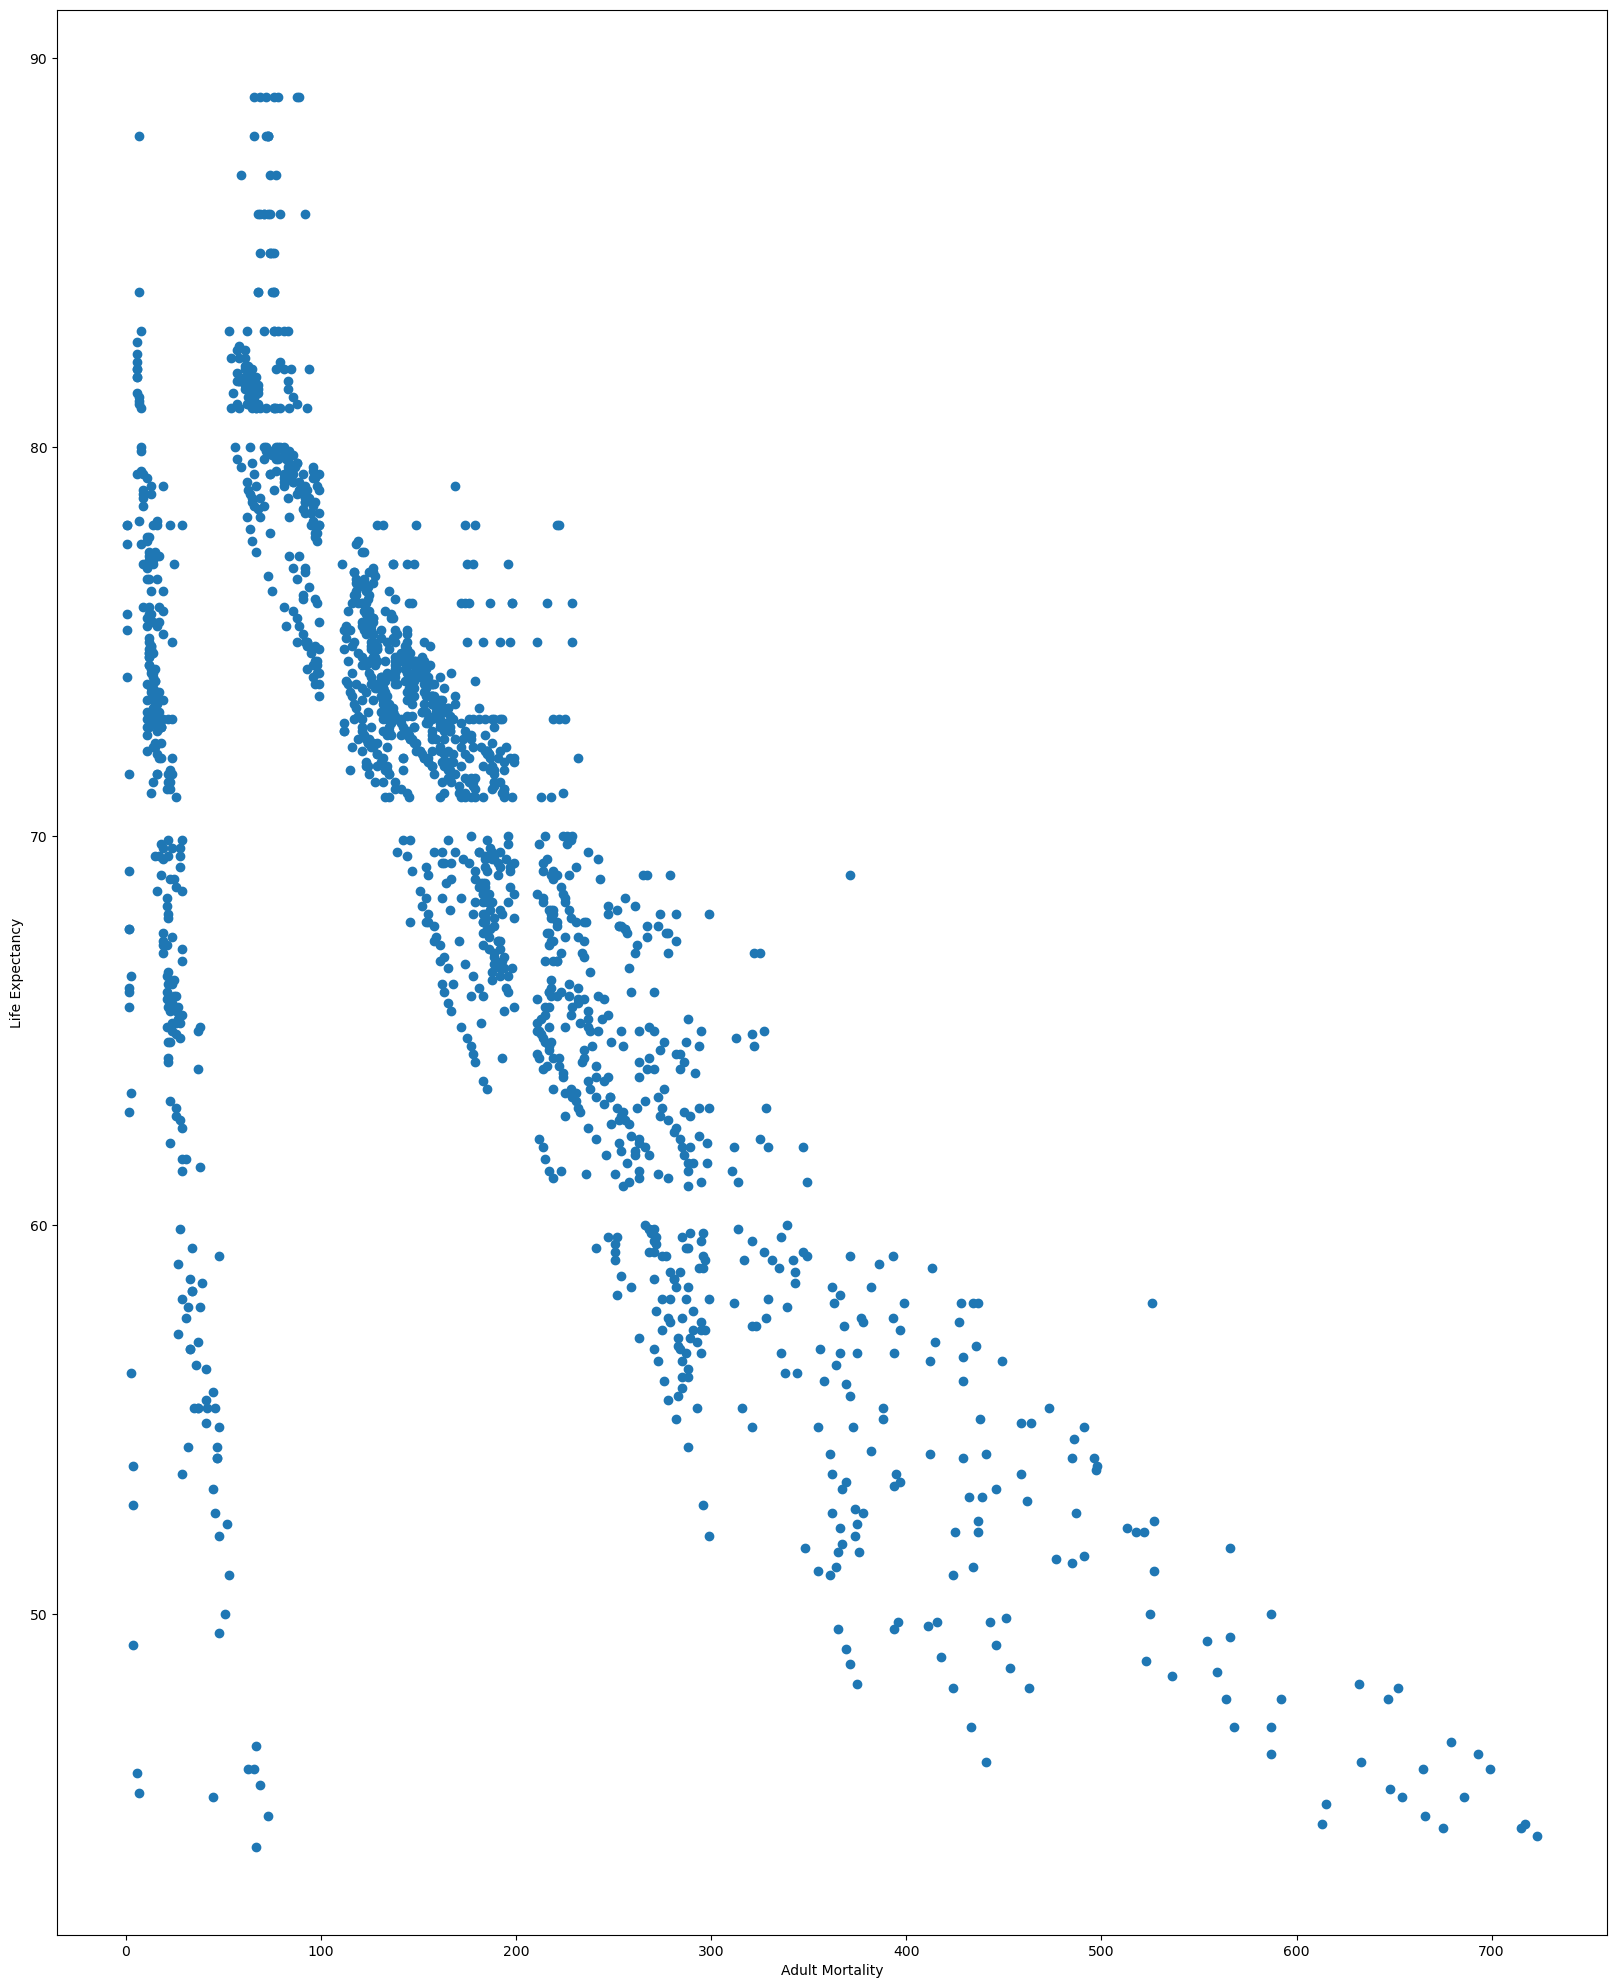

In [84]:
plt.figure(figsize=(20,25))
plt.scatter(X_am, y)

plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.show()

In [85]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
X_am.reshape(-1,1)
y.reshape(-1,1)

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [87]:
model = LinearRegression()
model.fit(X_am,y)

LinearRegression()

In [88]:
model.fit(X_am,y)

LinearRegression()

Text(0, 0.5, 'Life Expectancy')

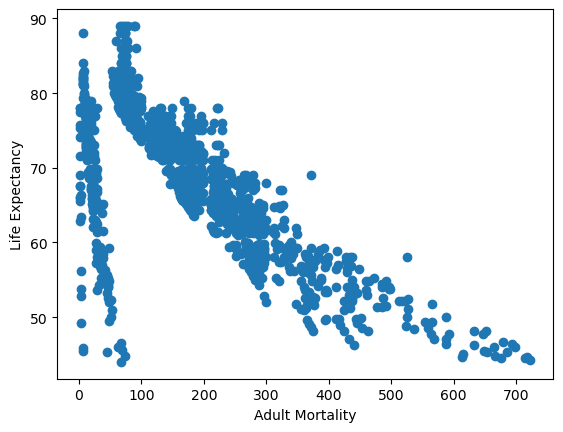

In [89]:
plt.scatter(X_am,y)
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy")

In [90]:
print(X_am)

[[263.]
 [271.]
 [268.]
 ...
 [ 73.]
 [686.]
 [665.]]


In [91]:
x_test = np.array([[101]])
y_pred = model.predict(x_test)
print(y_pred)

[[72.61718464]]


In [92]:

y = df[['Life expectancy ']].values
X_bmi = df[[' BMI ']].values

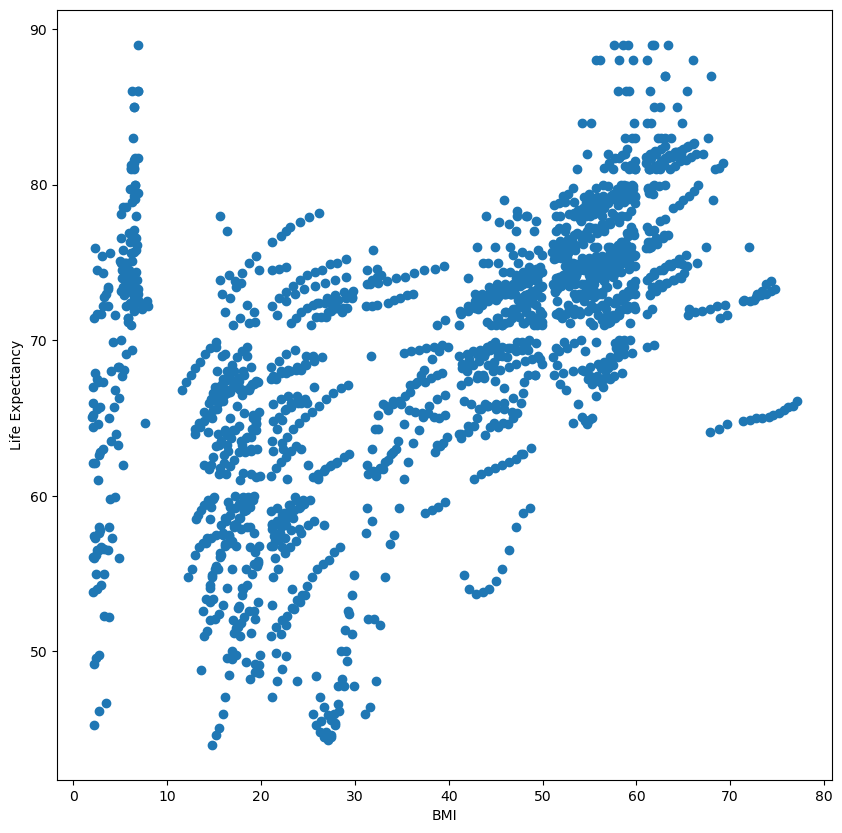

In [93]:
plt.figure(figsize=(10 ,10))
plt.scatter(X_bmi, y)
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

In [94]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
X_bmi.reshape(-1,1)
y.reshape(-1,1)

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [96]:
model1=LinearRegression()

In [97]:
print(X_bmi.shape)

(1649, 1)


In [98]:
X_bmi2=X_bmi.reshape(-1, 1)
print(X_bmi2.shape)

(1649, 1)


In [99]:
X_bmi2[np.isnan(X_bmi2)]=18

In [100]:
y[np.isnan(y)]=65

In [101]:
model1.fit(X_bmi2,y)

LinearRegression()

In [102]:
print(X_bmi)

[[19.1]
 [18.6]
 [18.1]
 ...
 [26.3]
 [25.9]
 [25.5]]


In [103]:
model1.fit(X_bmi2,y)

LinearRegression()

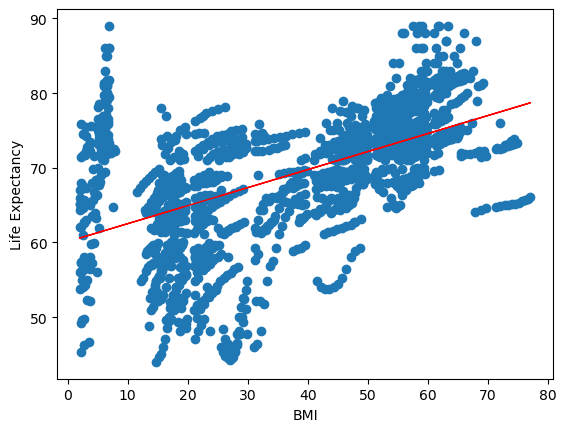

In [104]:
plt.scatter(X_bmi, y)
plt.xlabel("BMI")
plt.ylabel("Life Expectancy")
plt.plot(X_bmi, model1.predict(X_bmi2), color='red', linewidth=1)
plt.show()

In [105]:
x_test = np.array([[22]])
y_pred = model1.predict(x_test)
print(y_pred)


[[65.40920244]]


In [106]:
x_test_0 = np.array([[101]])
x_test_1 = np.array([[22]])
y_pred=model1.predict((x_test_0)+model1.predict(x_test_1)/2)
print(y_pred)

[[92.37228503]]


In [107]:
adult=int(input("Enter adult mortality rate "))
bmi=int(input("Enter BMI "))
x_test_0 = np.array([[adult]])
x_test_1 = np.array([[bmi]])
y_pred=model1.predict((x_test_0)+model1.predict(x_test_1)/2)
print(y_pred)            

KeyboardInterrupt: Interrupted by user

In [108]:

y = df[['Life expectancy ']].values
X_alcohol= df[['Alcohol']].values

In [109]:
print(X_alcohol)

[[0.01]
 [0.01]
 [0.01]
 ...
 [4.43]
 [1.72]
 [1.68]]


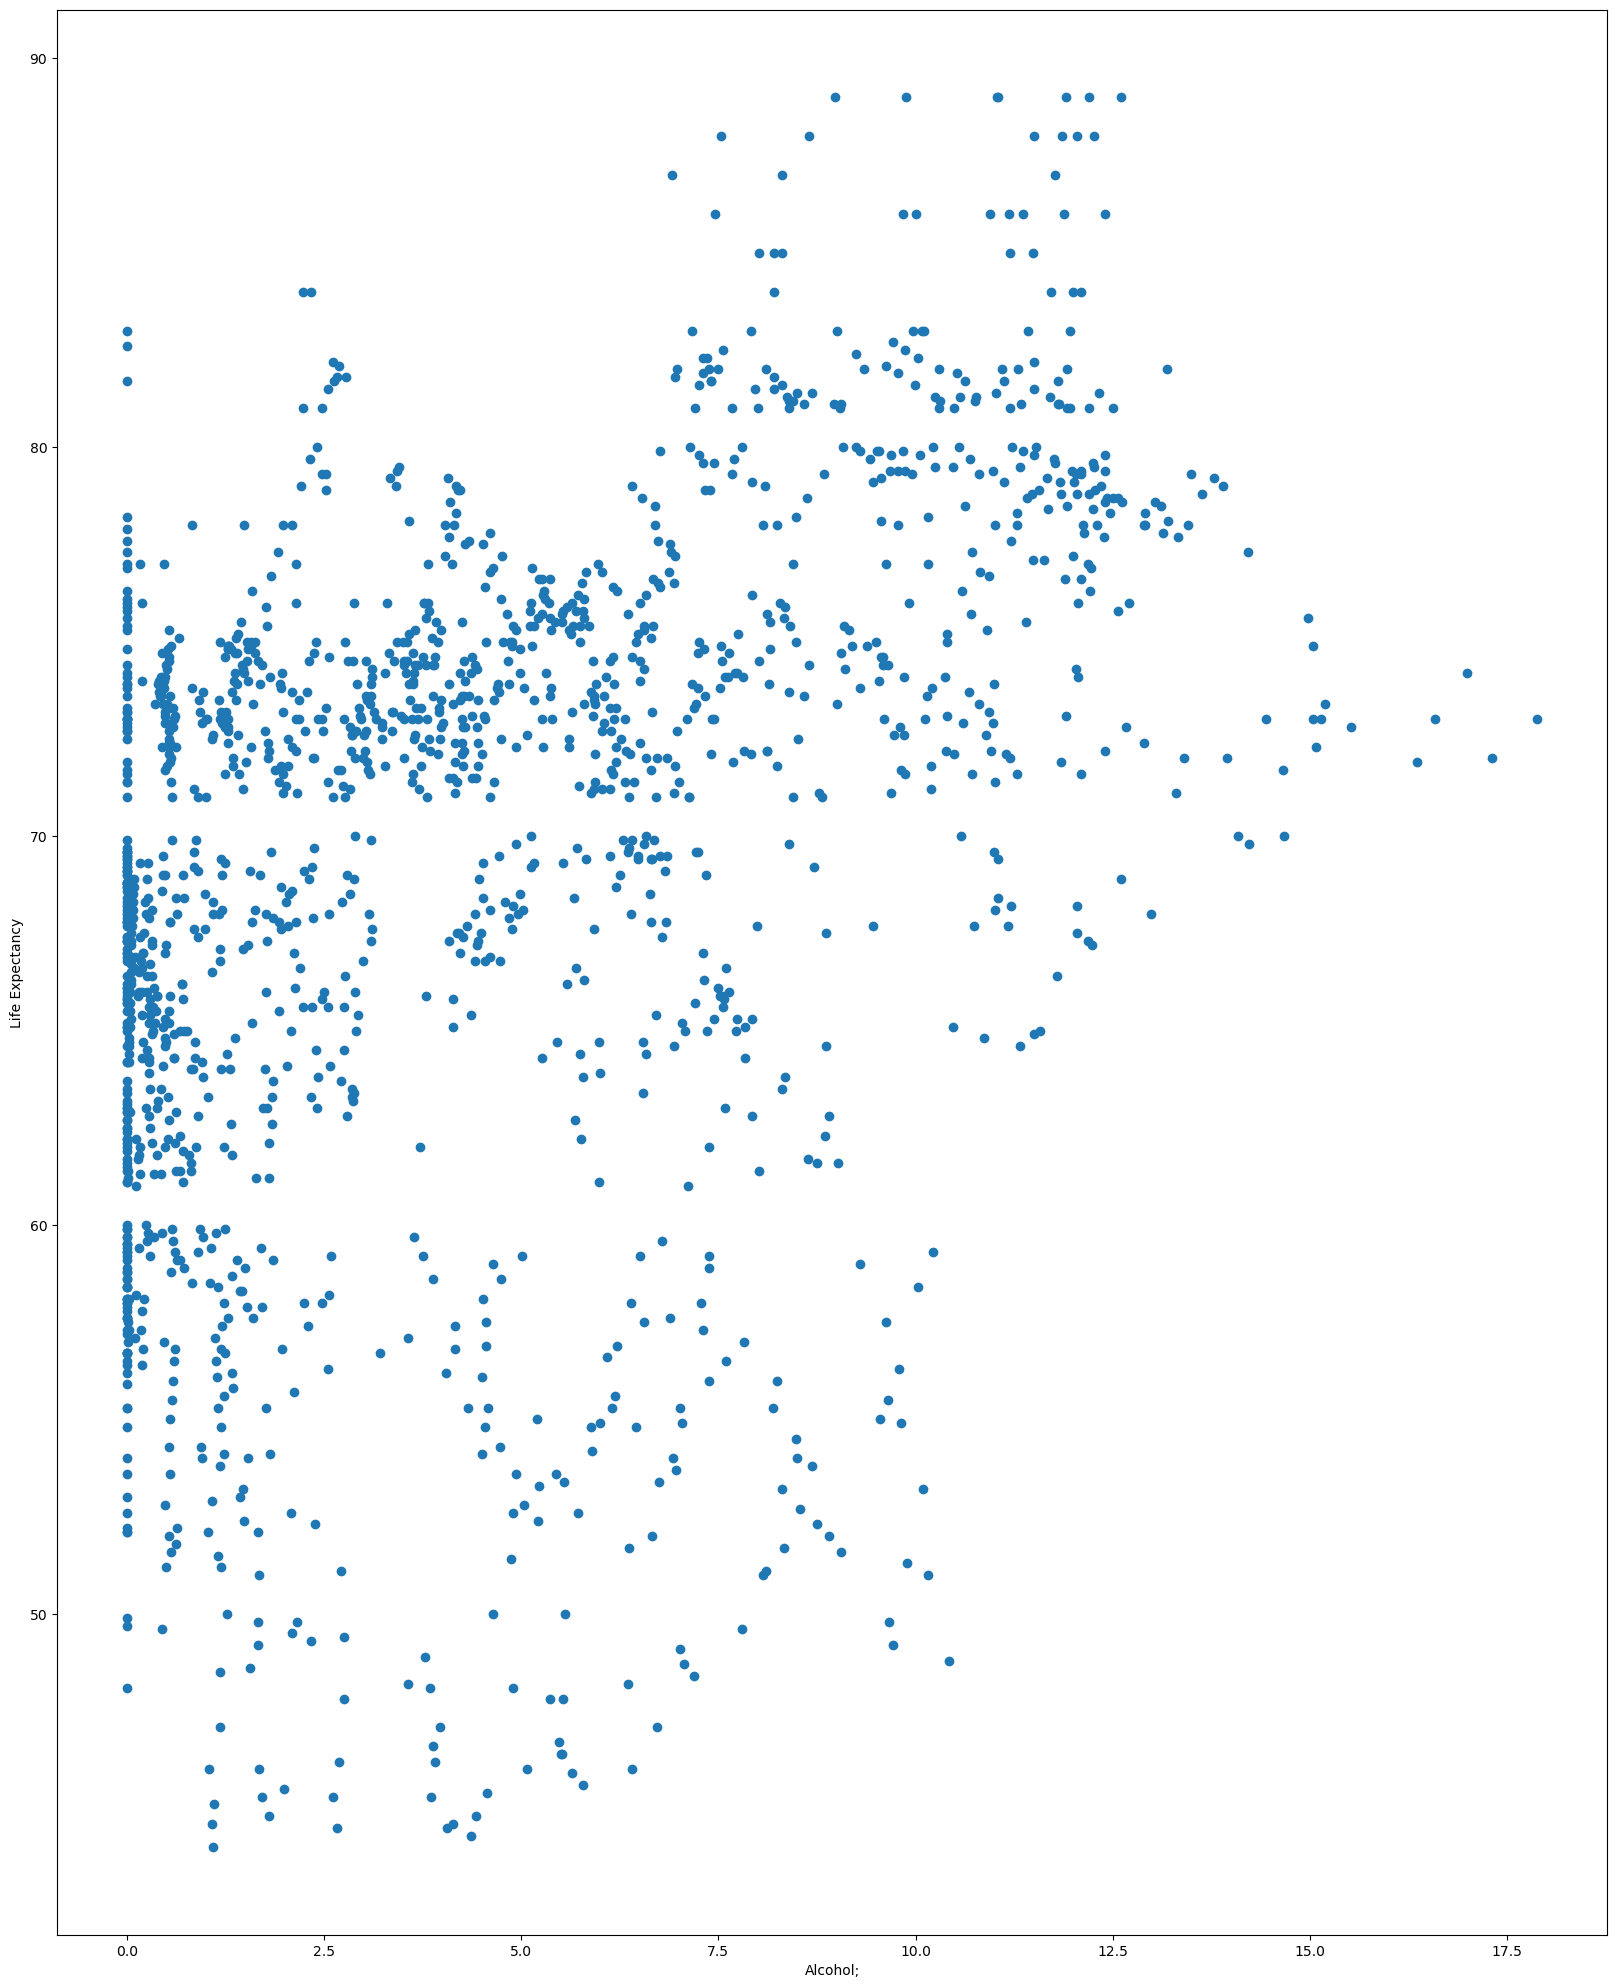

In [110]:
plt.figure(figsize=(20, 25))
plt.scatter(X_alcohol, y)
plt.xlabel('Alcohol;')
plt.ylabel('Life Expectancy')
plt.show()

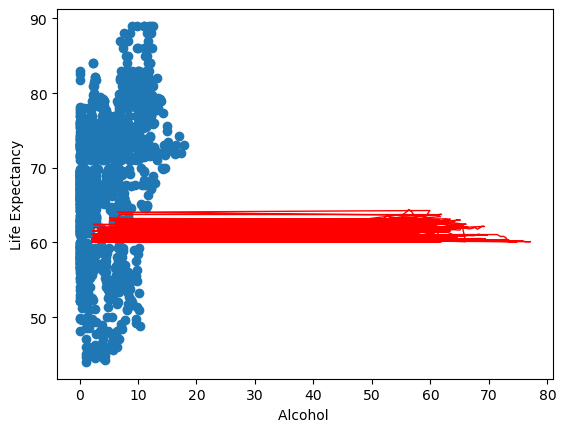

In [111]:

plt.scatter(X_alcohol, y)
plt.xlabel("Alcohol ")
plt.ylabel("Life Expectancy")
plt.plot(X_bmi, model1.predict(X_alcohol), color='red', linewidth=1)
plt.show()

In [112]:
X_alcohol.reshape(-1,1)
y.reshape(-1,1)

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [113]:
X_alcohol[np.isnan(X_alcohol)]=0

In [114]:
y[np.isnan(y)]=65

In [115]:
model2 = LinearRegression()
model2.fit(X_alcohol,y)

LinearRegression()

In [116]:
model2.fit(X_alcohol,y)

LinearRegression()

Text(0, 0.5, 'Life Expectancy')

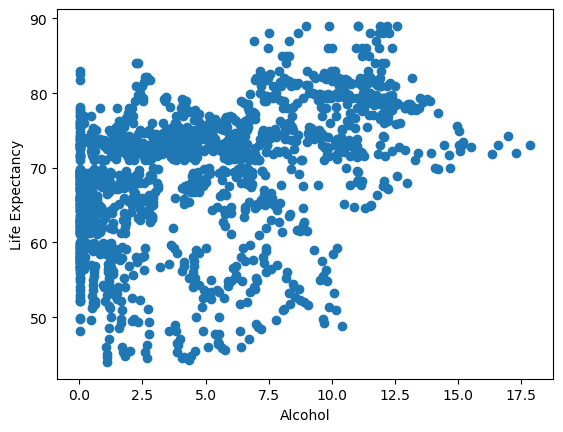

In [117]:
plt.scatter(X_alcohol, y)
plt.xlabel("Alcohol")
plt.ylabel("Life Expectancy")

In [118]:
x_test = np.array([[7.5]])
y_pred = model2.predict(x_test)
print(y_pred)


[[71.91085359]]


In [119]:
for col in df.columns:
    print(col)
    

Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [120]:

y = df[['Life expectancy ']].values
X_Totalexpenditure= df[['Total expenditure']].values

In [121]:
print(X_Totalexpenditure)

[[8.16]
 [8.18]
 [8.13]
 ...
 [6.53]
 [6.16]
 [7.1 ]]


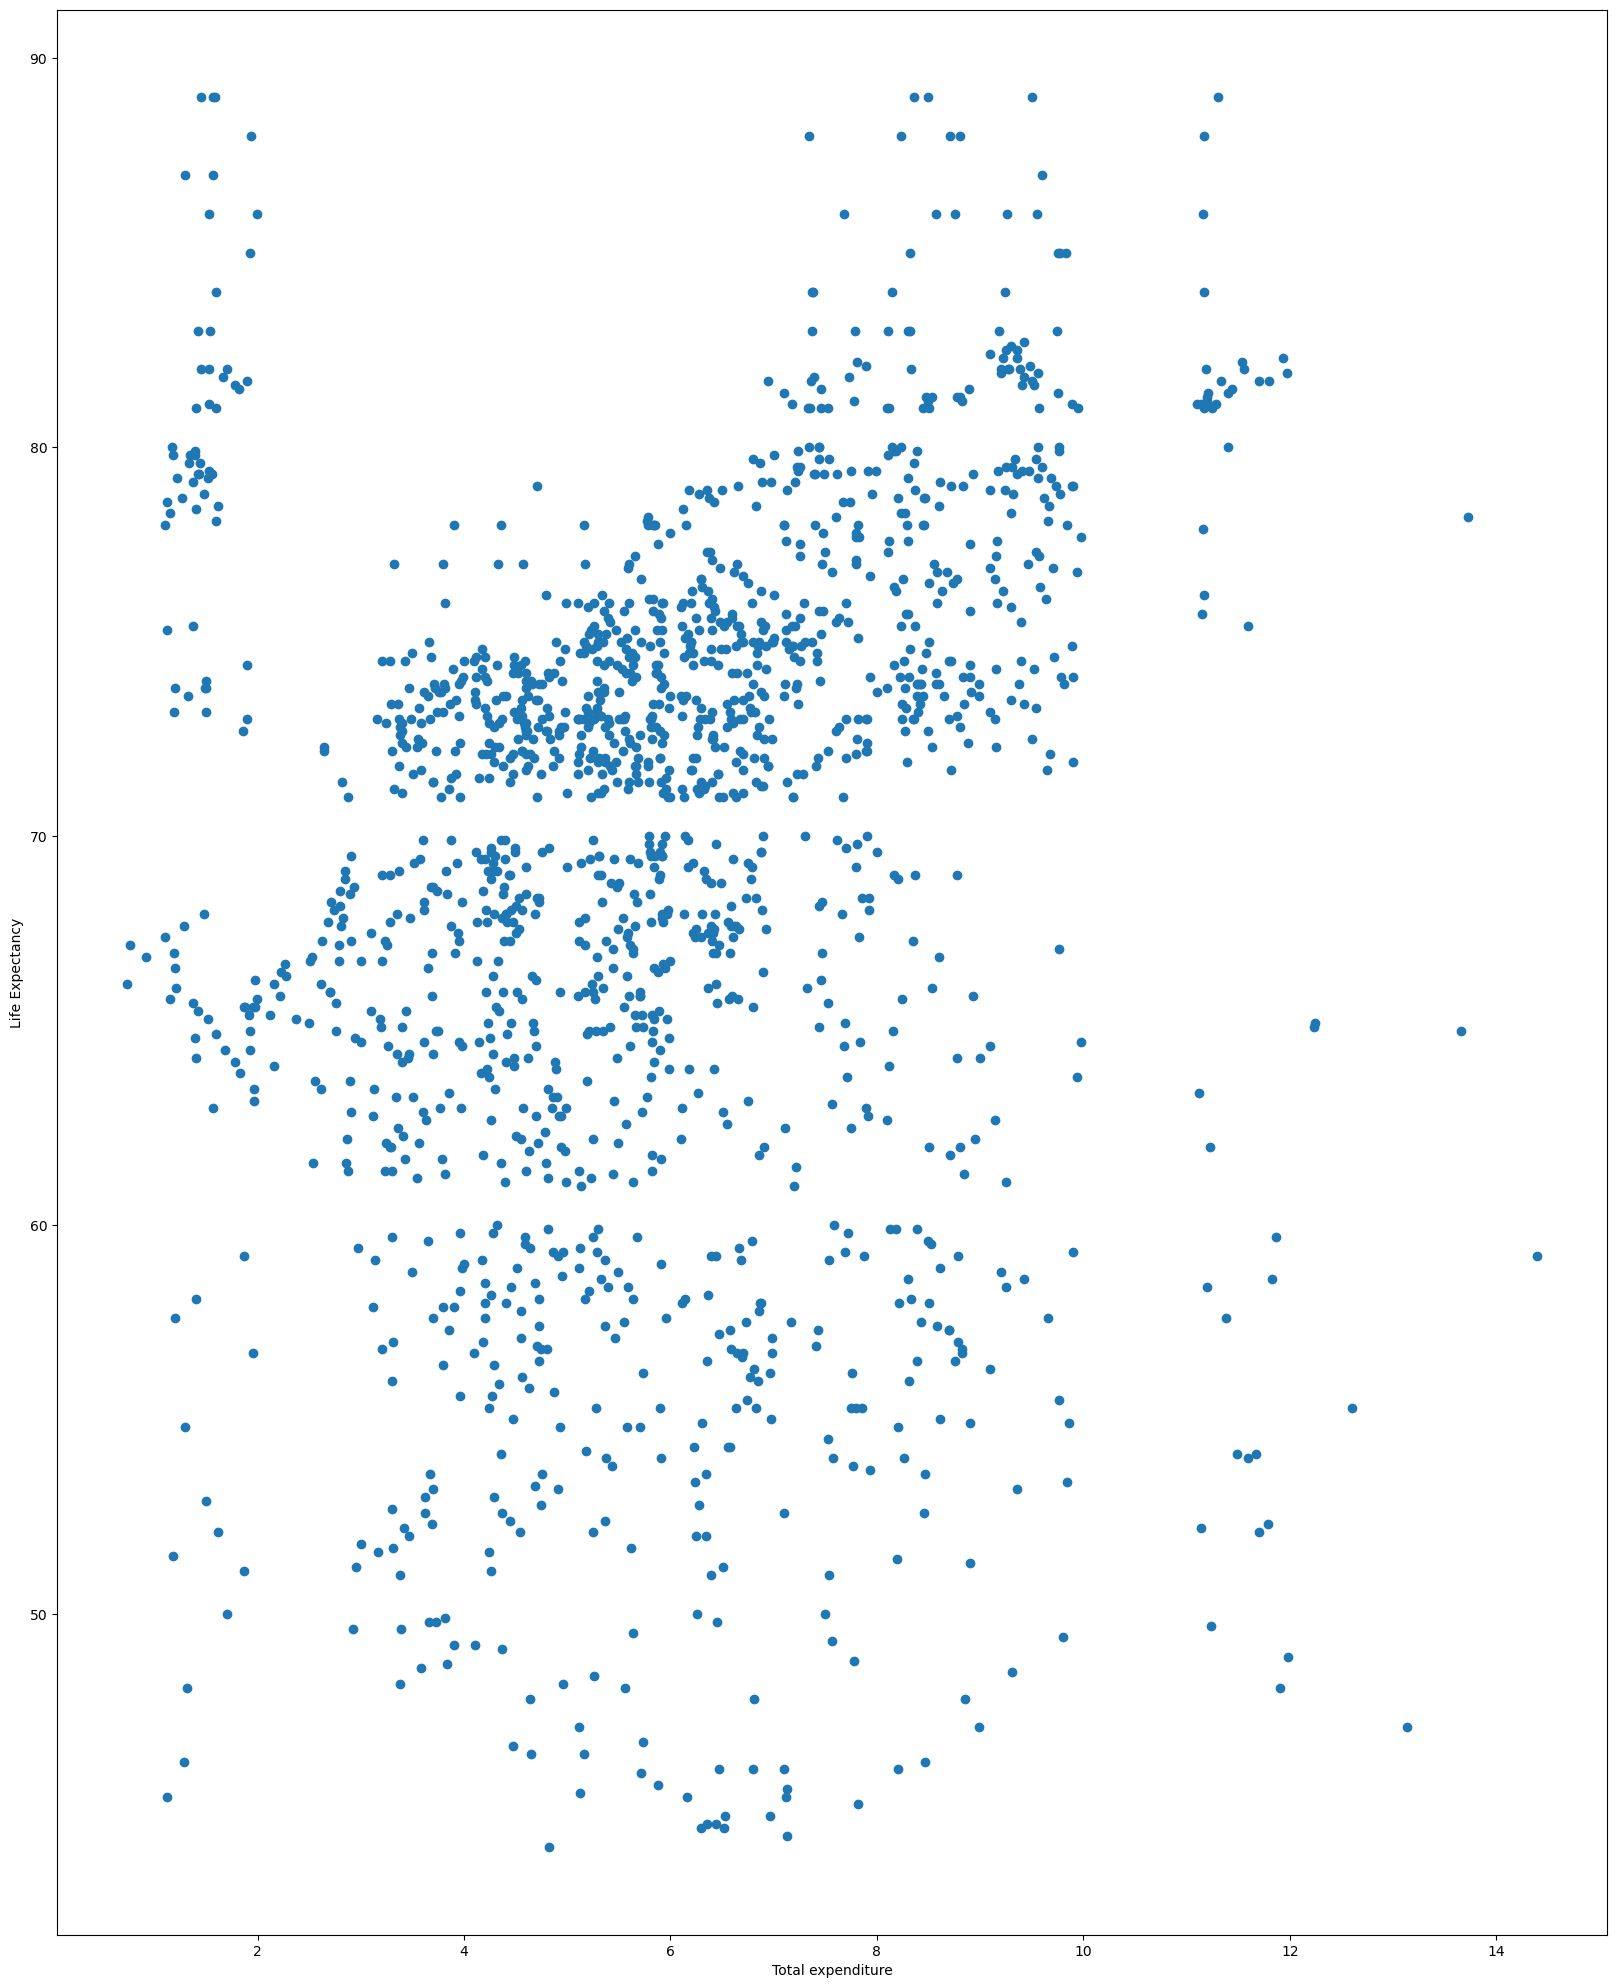

In [122]:
plt.figure(figsize=(20, 25))
plt.scatter(X_Totalexpenditure, y)
plt.xlabel('Total expenditure')
plt.ylabel('Life Expectancy')
plt.show()

NameError: name 'model3' is not defined

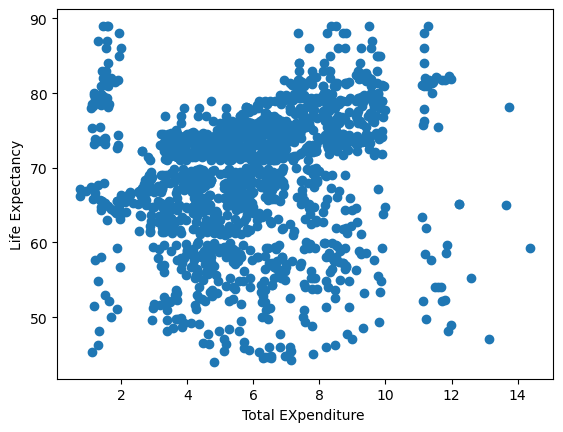

In [123]:

plt.scatter(X_Totalexpenditure, y)
plt.xlabel("Total EXpenditure ")
plt.ylabel("Life Expectancy")
plt.plot(X_Totalexpenditure, model3.predict(X_Totalexpenditure), color='black', linewidth=1)
plt.show()

In [124]:
X_Totalexpenditure.reshape(-1,1)
y.reshape(-1,1)

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [125]:
X_Totalexpenditure[np.isnan(X_Totalexpenditure)]=10

In [126]:
y[np.isnan(y)]=65

In [127]:
model3 = LinearRegression()
model3.fit(X_Totalexpenditure,y)

LinearRegression()

In [128]:
model3.fit(X_Totalexpenditure,y)

LinearRegression()

Text(0, 0.5, 'Life Expectancy')

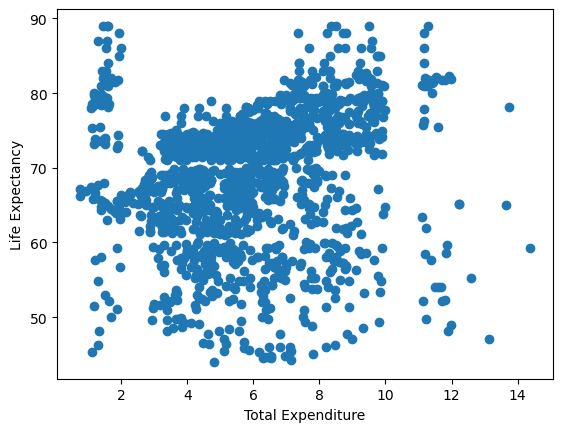

In [129]:
plt.scatter(X_Totalexpenditure, y)
plt.xlabel("Total Expenditure")
plt.ylabel("Life Expectancy")

In [130]:
x_test = np.array([[72]])
y_pred = model3.predict(x_test)
print(y_pred)

[[113.44768343]]


In [131]:
for col in df.columns:
    print(col)

Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [132]:
modelf=LinearRegression()

In [133]:
y= df[['Life expectancy ']].values
x= (df[['Total expenditure']].values+ df[['Alcohol']].values+ df[[' BMI ']].values+ df[['Adult Mortality']].values)

In [134]:
x[np.isnan(x)]=0

In [135]:
y[np.isnan(y)]=65

In [136]:
modelf.fit(x,y)

LinearRegression()

In [138]:
adult=int(input("Enter adult mortality rate "))
bmi=int(input("Enter BMI "))
alcohol=int(input("Enter average alcohol consumption"))
total_expenditure=int(input("Enter average total expenditure"))
x_test_0 = np.array([[adult]])
x_test_1 = np.array([[bmi]])
x_test_2 = np.array([[alcohol]])
x_test_3 = np.array([[total_expenditure]])
y_pred=modelf.predict(((x_test_0)+model1.predict(x_test_1)+model2.predict(x_test_2)+model3.predict(x_test_3))/4)
print(y_pred)

KeyboardInterrupt: Interrupted by user

In [139]:
import joblib
  
# Save the trained model as a pickle string.
joblib.dump(modelf,"modelf_model.sav")
  
# # Load the pickled model
# knn_from_pickle = pickle.loads(saved_model)
  
# # Use the loaded pickled model to make predictions
# knn_from_pickle.predict(X_test)

['modelf_model.sav']

In [140]:
joblib.dump(model,"model0.sav")

['model0.sav']

In [141]:
joblib.dump(model1,"model1.sav")

['model1.sav']

In [142]:
joblib.dump(model1,"model2.sav")

['model2.sav']

In [143]:
joblib.dump(model1,"model3.sav")

['model3.sav']

In [144]:
for col in df.columns:
    print(col)
    
    

Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [145]:
y = df['Life expectancy '].values
X_pop = df['Population'].values

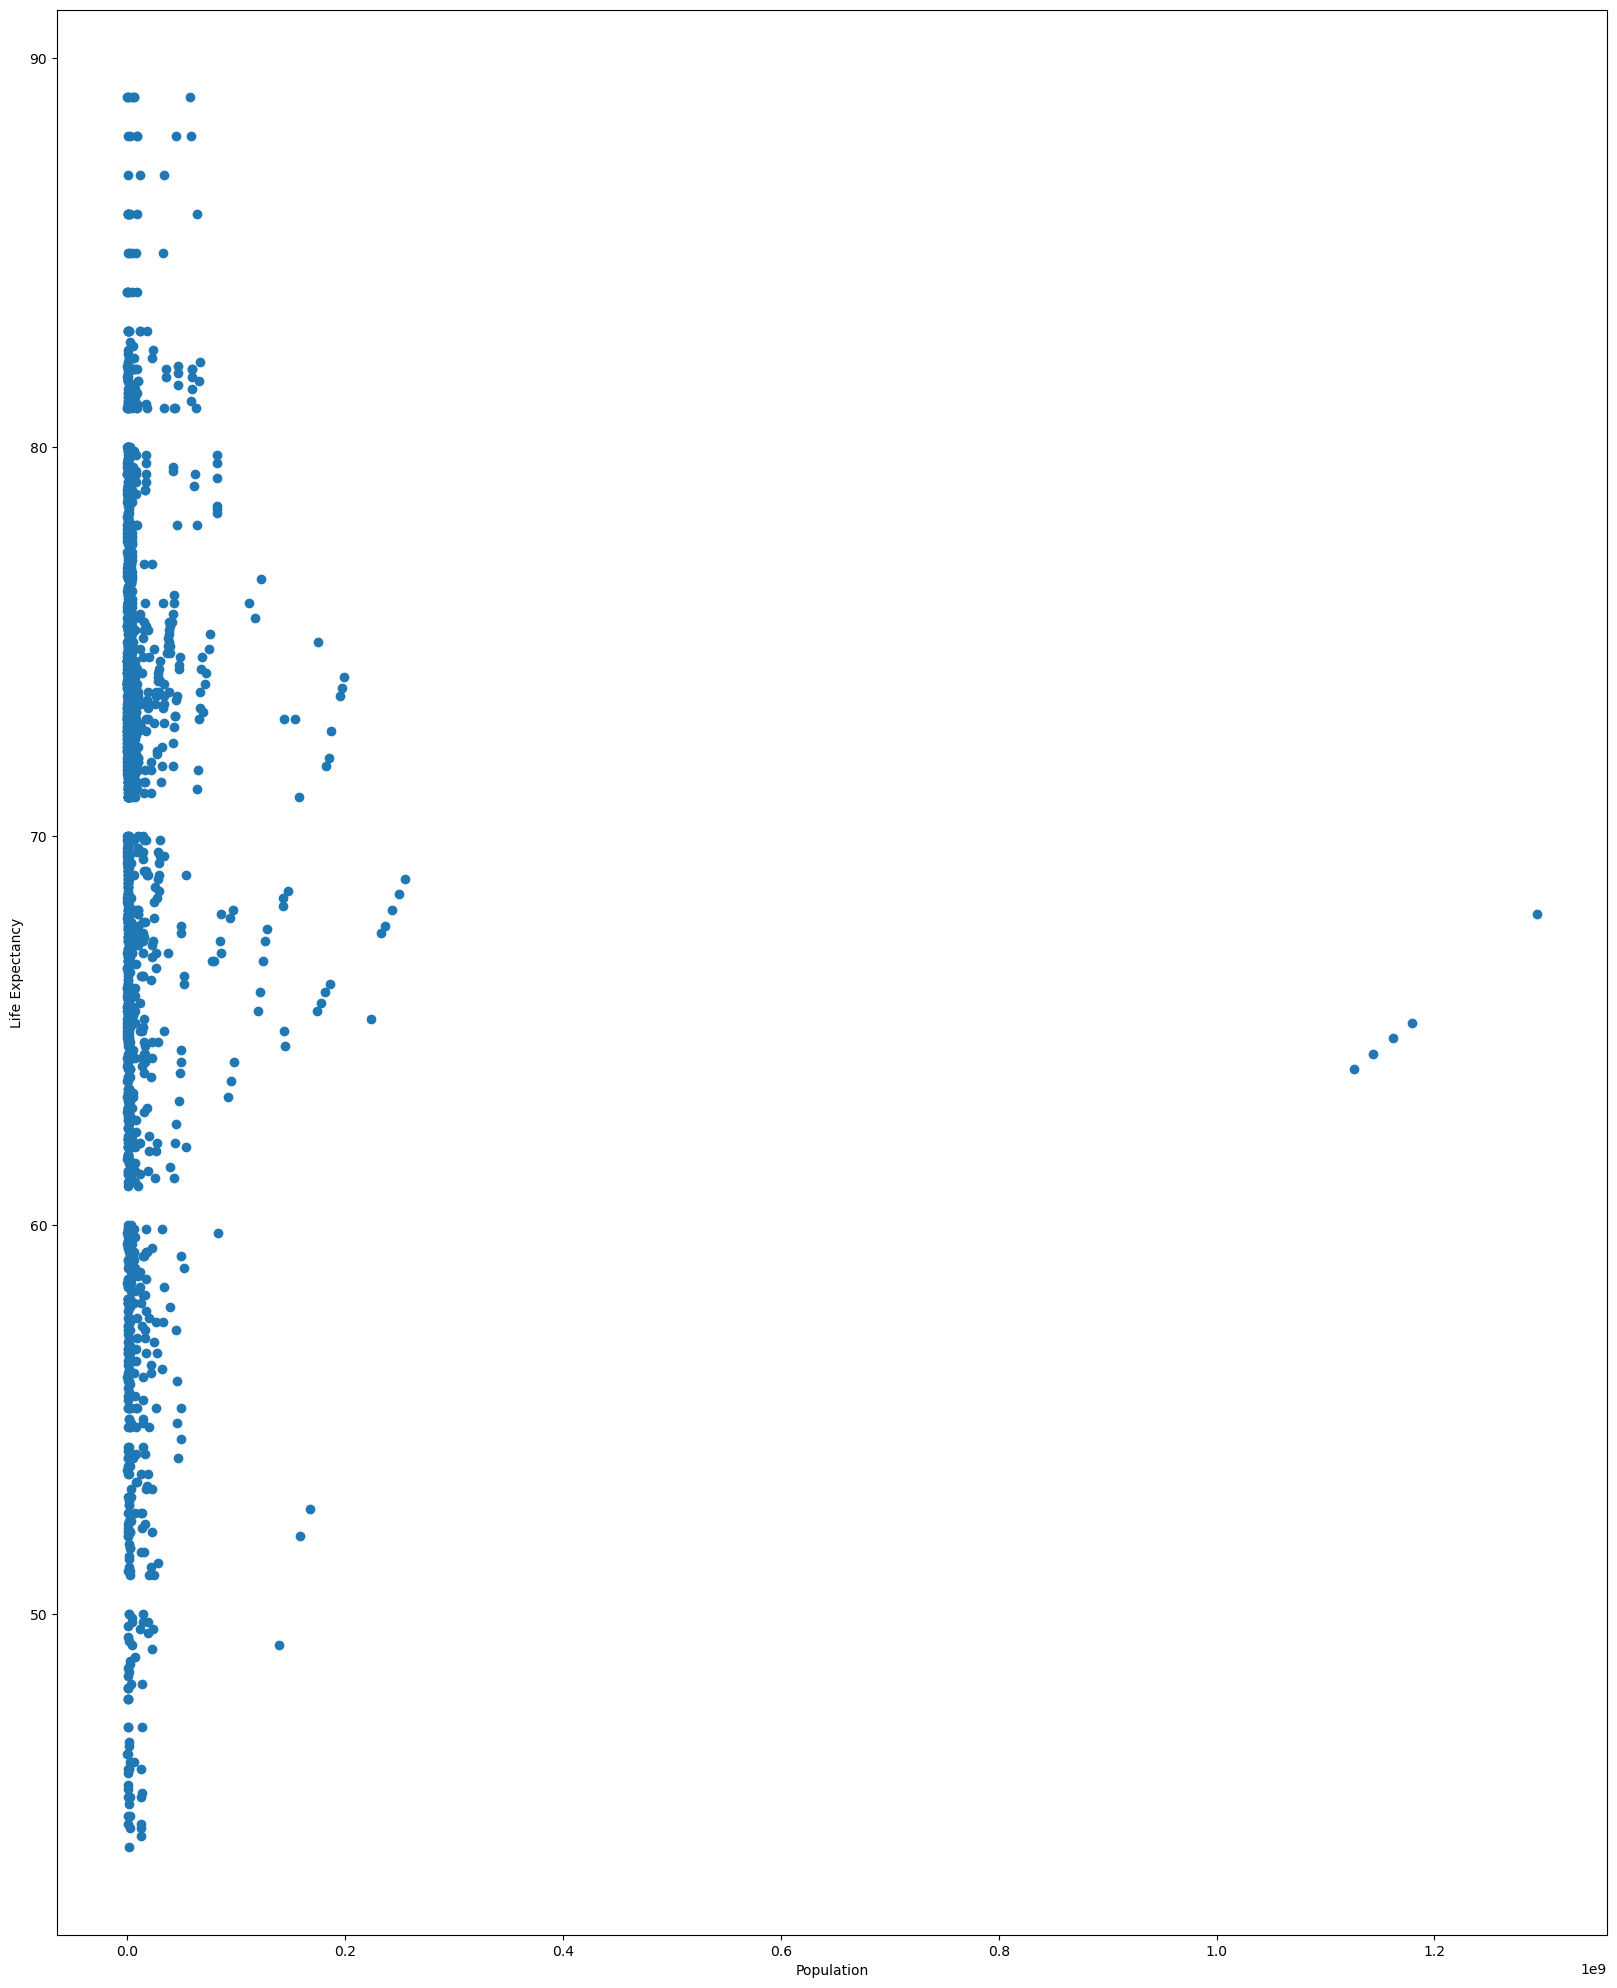

In [146]:
plt.figure(figsize=(20,25))
plt.scatter(X_pop, y)

plt.xlabel('Population')
plt.ylabel('Life Expectancy')
plt.show()

In [147]:
X_pop.reshape(-1,1)
y.reshape(-1,1)

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

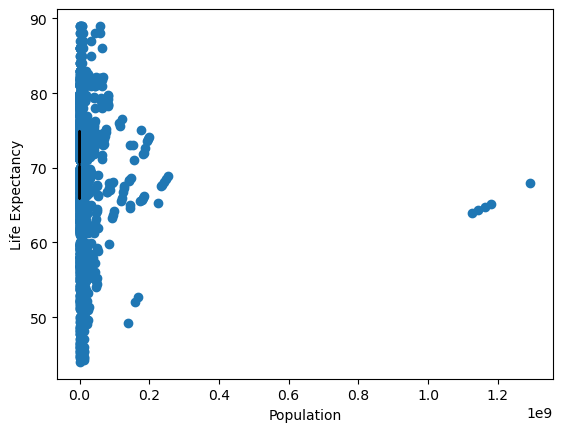

In [151]:

plt.scatter(X_pop, y)
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.plot(X_Totalexpenditure, model3.predict(X_Totalexpenditure), color='black')
plt.show()

In [152]:
X_pop.reshape(-1,1)
y.reshape(-1,1)

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [156]:
print(X_pop)

[33736494.   327582. 31731688. ...   125525. 12366165. 12222251.]


In [158]:
X_pop=X_pop.reshape(-1,1)
y=y.reshape(-1,1)

In [159]:
model4 = LinearRegression()
model4.fit(X_Totalexpenditure,y)

LinearRegression()

In [160]:
model4.fit(X_pop,y)

LinearRegression()

Text(0, 0.5, 'Life Expectancy')

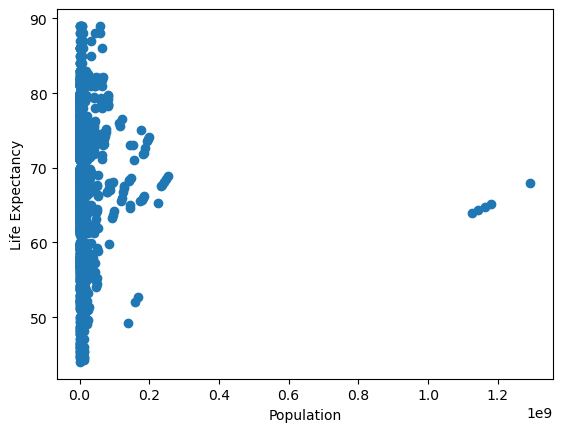

In [161]:
plt.scatter(X_pop, y)
plt.xlabel("Population")
plt.ylabel("Life Expectancy")

In [162]:
joblib.dump(model4,"model4.sav")

['model4.sav']

In [163]:
for col in df.columns:
    print(col)
    

Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [165]:
X_pop.max()

1293859294.0